In [1]:
import pickle
import os

In [2]:
cd ../test_data

/Users/sashi/repos/ThinkChipBackend/test_data


In [3]:
k = os.listdir()
print(list(enumerate(k)))

[(0, '[f]aditya_eyes_closed|151019_144531.pickle'), (1, '[f]aditya_work|151019_150218.pickle'), (2, '[f]assignment|141019_190516.pickle'), (3, '[f]eyes_closed|141019_160513.pickle'), (4, '[f]facebook|141019_160022.pickle'), (5, '[f]hcl_1|111019_142206.pickle'), (6, '[f]reading_research_paper_1|111019_145415.pickle'), (7, '[f]reading_research_paper_1|111019_150922.pickle'), (8, '[f]sashi_assignment|151019_140830.pickle'), (9, '[f]sashi_eyes_closed|151019_135421.pickle'), (10, '[f]social_media|111019_153856.pickle'), (11, 'call_of_duty.pickle'), (12, 'facebook.pickle'), (13, 'raghav_eyes_closed'), (14, 'SingleBlinksData')]


In [4]:
# Eyes Closed Data
with open(k[9],'rb') as f:
    data1 = pickle.load(f)

In [5]:
# Assignment Data
with open(k[8],'rb') as f:
    data2 = pickle.load(f)

In [6]:
# # Assignment data
# with open(k[0], 'rb') as f:
#     data3 = pickle.load(f)

/usr/local/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


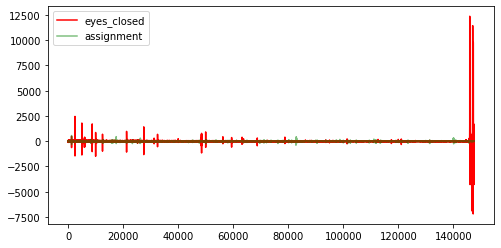

In [7]:
# Plot the filtered (DC and 50Hz notch) data without removing bad epochs
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(8,4))
plt.plot(data1[10:,0,:].reshape(-1), 'r', alpha=1, label='eyes_closed')
plt.plot(data2[10:,0,:].reshape(-1), 'g', alpha=0.5, label='assignment')
#plt.plot(data3[10:,0,:].reshape(-1), 'g', alpha=0.5, label='Assignment')
plt.legend()

In [8]:
import sys
sys.path.append('../')

In [9]:
from features import feature_removal as fr

Using config.dataReader - random number


In [10]:
# Removing bad epochs containing eye blinks
import config
config.reset_filter_states() # Why do we need to reset filter states?
out1 = fr.remove_bad_epochs(data1,fr.energy_of_epoch,threshold=400)
config.reset_filter_states()
out2 = fr.remove_bad_epochs(data2,fr.energy_of_epoch,400)
# config.reset_filter_states()
# out3 = fr.remove_bad_epochs(data3,fr.energy_of_epoch,400)

CONSOLE: ENEGERGY: 486542.00798278174
CONSOLE: ENEGERGY: 77814.53933080405
CONSOLE: ENEGERGY: 8236.526412577003
CONSOLE: ENEGERGY: 418.7481262841327
CONSOLE: ENEGERGY: 187.6976517123181
CONSOLE: ENEGERGY: 515.7414261543726
CONSOLE: ENEGERGY: 772.6427271328087
CONSOLE: ENEGERGY: 85.33453167981733
CONSOLE: ENEGERGY: 274.04472804203135
CONSOLE: ENEGERGY: 57.3292198773736
CONSOLE: ENEGERGY: 53.706264125660894
CONSOLE: ENEGERGY: 43.80967710863083
CONSOLE: ENEGERGY: 381.7210945107038
CONSOLE: ENEGERGY: 289.96076876428447
CONSOLE: ENEGERGY: 47.70718355994291
CONSOLE: ENEGERGY: 51.27966663823108
CONSOLE: ENEGERGY: 52.79161064440788
CONSOLE: ENEGERGY: 65.26818001028064
CONSOLE: ENEGERGY: 92.62011679775986
CONSOLE: ENEGERGY: 76.97690420291117
CONSOLE: ENEGERGY: 68.07926979348203
CONSOLE: ENEGERGY: 131.55998847796724
CONSOLE: ENEGERGY: 65.33009051581713
CONSOLE: ENEGERGY: 15.668494482498525
CONSOLE: ENEGERGY: 39.86430824710926
CONSOLE: ENEGERGY: 85.84321396398698
CONSOLE: ENEGERGY: 45.51669613937

CONSOLE: ENEGERGY: 242814.1634289853
CONSOLE: ENEGERGY: 40290.10542153404
CONSOLE: ENEGERGY: 4974.711379585052
CONSOLE: ENEGERGY: 186.57025059813236
CONSOLE: ENEGERGY: 32.475027086917144
CONSOLE: ENEGERGY: 58.724025844903196
CONSOLE: ENEGERGY: 37.54299039305003
CONSOLE: ENEGERGY: 29.380351731710775
CONSOLE: ENEGERGY: 49.71063207554442
CONSOLE: ENEGERGY: 25.149488422592228
CONSOLE: ENEGERGY: 42.50106017769172
CONSOLE: ENEGERGY: 64.88803102325905
CONSOLE: ENEGERGY: 88.20851692782973
CONSOLE: ENEGERGY: 48.94890017008146
CONSOLE: ENEGERGY: 61.50071322563116
CONSOLE: ENEGERGY: 61.29937286798452
CONSOLE: ENEGERGY: 44.40283115095513
CONSOLE: ENEGERGY: 47.85386741903526
CONSOLE: ENEGERGY: 32.41995506514428
CONSOLE: ENEGERGY: 46.253928375107485
CONSOLE: ENEGERGY: 140.53360951026494
CONSOLE: ENEGERGY: 73.10979050328923
CONSOLE: ENEGERGY: 53.23575007909791
CONSOLE: ENEGERGY: 22.2578281383054
CONSOLE: ENEGERGY: 22.67197886774109
CONSOLE: ENEGERGY: 33.45417001816709
CONSOLE: ENEGERGY: 27.2053086324

In [11]:
out1.shape, out2.shape #out3.shape

((1162, 1, 250), (1135, 1, 250))

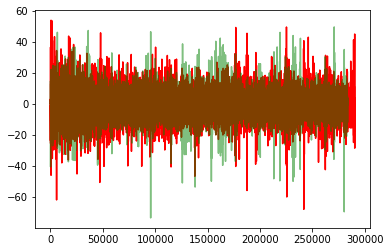

In [12]:
plt.plot(out1.squeeze().reshape(-1), 'r', alpha=1)
plt.plot(out2.squeeze().reshape(-1), 'g', alpha=0.5)
#plt.plot(out3.squeeze().reshape(-1),alpha=0.4)

In [13]:
out1.shape
#out2.shape
#out3.shape

(1162, 1, 250)

In [14]:
from features import *

In [15]:
bandpower1 = []
bandpower2 = []
bandpower3 = []
for o in out1:
    bandpower1.append(get_bandpower(o.reshape(1,o.shape[0],o.shape[1])))
for o in out2:
    bandpower2.append(get_bandpower(o.reshape(1,o.shape[0],o.shape[1])))
# for o in out3:
#     bandpower3.append(get_bandpower(o.reshape(1,o.shape[0],o.shape[1])))

/usr/local/lib/python3.7/site-packages/scipy/signal/spectral.py:1773: UserWarning: nperseg = 500 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


In [16]:
bandpower1 = np.array(bandpower1)
bandpower2 = np.array(bandpower2)
# bandpower3 = np.array(bandpower3)
print(bandpower1.shape)
print(bandpower2.shape)
# print(bandpower3.shape)

(1162, 1, 5)
(1135, 1, 5)


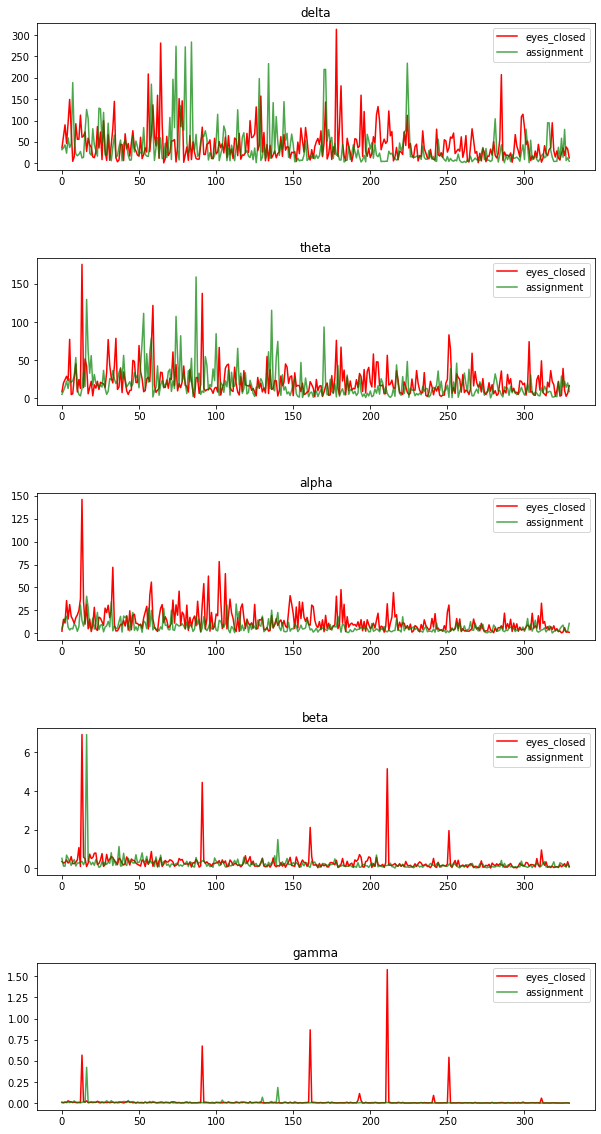

In [17]:
fig,ax = plt.subplots(5,1,figsize=(10,20))
fig.subplots_adjust(hspace=0.6)
bands = ['delta','theta','alpha','beta', 'gamma']

for i, a in enumerate(ax):
    a.plot(bandpower1[10:340,:,i].reshape(-1),c='r',label='eyes_closed', alpha=1)
    a.plot(bandpower2[10:340,:,i].reshape(-1),c='g',label='assignment', alpha=0.7)
#   a.plot(bandpower3[60:270,:,i].reshape(-1),c='g',label='assignment', alpha=0.5)
    a.set_title(bands[i])
    a.legend()

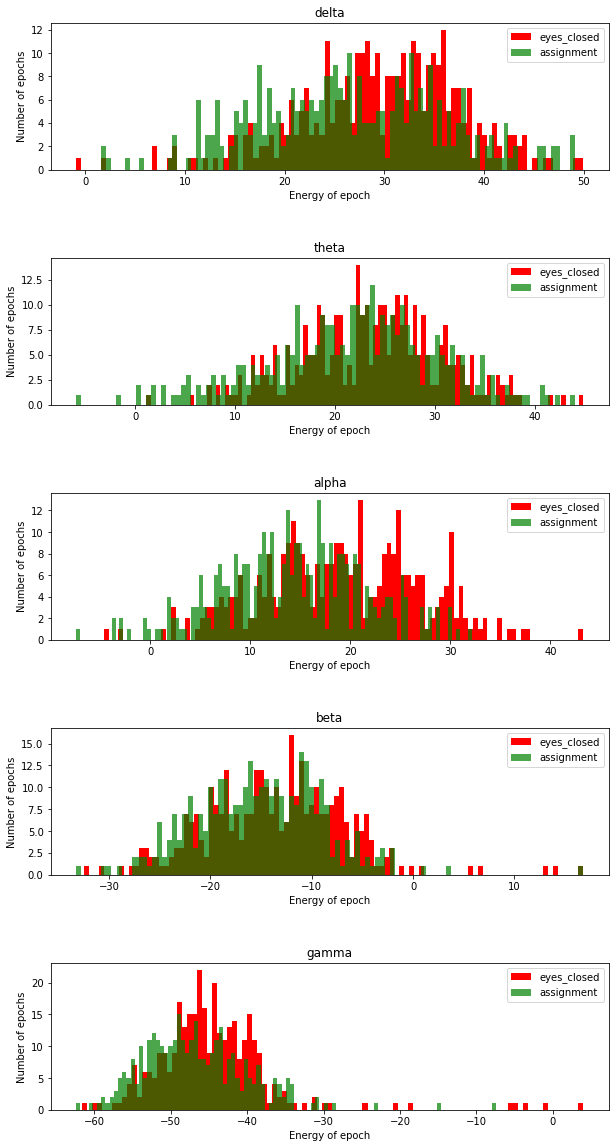

In [18]:
# Plot the histogram of bandpower to visualize the distribution of energy of each band
fig,ax = plt.subplots(5,1,figsize=(10,20))
fig.subplots_adjust(hspace=0.6)
bands = ['delta','theta','alpha','beta', 'gamma']

import numpy as np

n1, bins1 = [], []
n2, bins2 = [], []
for i, a in enumerate(ax):
    n1_tmp, bins1_tmp, _ = a.hist(20*np.log10(bandpower1[10:340,:,i].reshape(-1)), bins=100,
                               density=False, color='r',label='eyes_closed', alpha=1)
    n2_tmp, bins2_tmp, _ = a.hist(20*np.log10(bandpower2[10:340,:,i].reshape(-1)), bins=100,
                       density=False,color='g',label='assignment', alpha=0.7)
    n1.append(n1_tmp)
    bins1.append(bins1_tmp)
    n2.append(n2_tmp)
    bins2.append(bins2_tmp)
    a.set_title(bands[i])
    a.set_xlabel('Energy of epoch')
    a.set_ylabel('Number of epochs')
    a.legend()

# Comments
In the above histogram it looks like the total number of samples for eyes_closed are less than the total number of samples for assignment. Why is this? We have made both the vectors of same length. So they should both have same number of samples.

In [19]:
print(sum(n1_tmp))
print(bins1_tmp)
print(sum(n2_tmp))
print(bins2_tmp)

330.0
[-6.16729406e+01 -6.10165795e+01 -6.03602185e+01 -5.97038575e+01
 -5.90474964e+01 -5.83911354e+01 -5.77347744e+01 -5.70784133e+01
 -5.64220523e+01 -5.57656913e+01 -5.51093302e+01 -5.44529692e+01
 -5.37966081e+01 -5.31402471e+01 -5.24838861e+01 -5.18275250e+01
 -5.11711640e+01 -5.05148030e+01 -4.98584419e+01 -4.92020809e+01
 -4.85457199e+01 -4.78893588e+01 -4.72329978e+01 -4.65766367e+01
 -4.59202757e+01 -4.52639147e+01 -4.46075536e+01 -4.39511926e+01
 -4.32948316e+01 -4.26384705e+01 -4.19821095e+01 -4.13257485e+01
 -4.06693874e+01 -4.00130264e+01 -3.93566654e+01 -3.87003043e+01
 -3.80439433e+01 -3.73875822e+01 -3.67312212e+01 -3.60748602e+01
 -3.54184991e+01 -3.47621381e+01 -3.41057771e+01 -3.34494160e+01
 -3.27930550e+01 -3.21366940e+01 -3.14803329e+01 -3.08239719e+01
 -3.01676108e+01 -2.95112498e+01 -2.88548888e+01 -2.81985277e+01
 -2.75421667e+01 -2.68858057e+01 -2.62294446e+01 -2.55730836e+01
 -2.49167226e+01 -2.42603615e+01 -2.36040005e+01 -2.29476395e+01
 -2.22912784e+01 -2